# `Amazon Sales Data Analysis`

![dashboard.png](./data/Images/dashboard.png)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import ipywidgets as widgets
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
from IPython.display import Javascript, display, HTML


warnings.filterwarnings('ignore')
style = {'description_width': 'initial'}

### D3.js

* D3.js is a JavaScript library for manipulating documents based on data. D3 helps you bring data to life using HTML, SVG, and CSS. D3’s emphasis on web standards gives you the full capabilities of modern browsers without tying yourself to a proprietary framework, combining powerful visualization components and a data-driven approach to DOM manipulation

* Url https://d3js.org/

In [2]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v7.min'
    }
})

<IPython.core.display.Javascript object>

In [3]:
%%javascript
require(["d3"], function(d3){
    console.log(d3)
})

<IPython.core.display.Javascript object>

In [4]:
missing_values = ['N/A', 'na', np.nan, 'NaN']

In [5]:
df = pd.read_csv('D:/Datasets/Project/DATA/SALESDATA.csv', na_values=missing_values)

In [6]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,4/30/2017,-237.91,2017/04/30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,7/14/2017,368.79,2017/07/14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,10/17/2017,109.73,2017/10/17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,6/3/2017,-211.75,2017/06/03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,5/27/2017,96627.94,2017/05/27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [7]:
df.tail()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
65277,10017638,3/21/2018,505.78,2018/03/21,226497,P01,13447,High Top Oranges,8000,119.52,...,569.90,1075.68,239.95,329.95,63.322222,9,180,EA,NaN,NaN
65278,10017638,3/21/2018,410.75,2018/03/21,226497,P01,25906,Landslide White Sugar,38000,436.78,...,462.81,873.56,423.55,39.26,231.405000,2,180,EA,NaN,NaN
65279,10017638,3/21/2018,876.16,2018/03/21,226497,P01,61856,Moms Potato Salad,227001,232.92,...,987.20,1863.36,574.00,413.20,123.400000,8,180,EA,NaN,NaN
65280,10017638,3/21/2018,24226.77,2018/03/21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,...,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA,NaN,NaN
65281,10017638,3/21/2018,24479.26,2018/03/21,226498,P01,27550,Imagine Popsicles,4000,1084.61,...,27582.02,52061.28,14234.22,13347.80,574.625417,48,180,EA,NaN,NaN


In [8]:
df.drop(['Unnamed: 20', 'Unnamed: 21', 'Item Class'], axis=1, inplace=True)

In [9]:
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  int64  
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  int64  
 5   Item Number                       65241 non-null  object 
 6   Item                              65282 non-null  object 
 7   Line Number                       65282 non-null  int64  
 8   List Price                        65282 non-null  float64
 9   Order Number                      65282 non-null  int64  
 10  Promised Delivery Date            65282 non-null  object 
 11  Sales Amount                      65282 non-null  float64
 12  Sale

In [11]:
df.isnull().sum()

CustKey                              0
DateKey                              0
Discount Amount                      2
Invoice Date                         0
Invoice Number                       0
Item Number                         41
Item                                 0
Line Number                          0
List Price                           0
Order Number                         0
Promised Delivery Date               0
Sales Amount                         0
Sales Amount Based on List Price     0
Sales Cost Amount                    0
Sales Margin Amount                  0
Sales Price                          1
Sales Quantity                       0
Sales Rep                            0
U/M                                  0
dtype: int64

In [12]:
df['Discount Amount'].fillna(0, inplace=True)

In [13]:
df['Sales Price'].fillna(0, inplace=True)

In [14]:
df

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,4/30/2017,-237.91,2017/04/30,100012,NaN,Urban Large Eggs,2000,0.00,200015,4/30/2017,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,7/14/2017,368.79,2017/07/14,100233,20910,Moms Sliced Turkey,1000,824.96,200245,7/14/2017,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,10/17/2017,109.73,2017/10/17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,10/16/2017,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,6/3/2017,-211.75,2017/06/03,100096,NaN,Kiwi Lox,1000,0.00,200107,6/3/2017,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,5/27/2017,96627.94,2017/05/27,103341,60776,High Top Sweet Onion,1000,408.52,203785,5/28/2017,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,3/21/2018,505.78,2018/03/21,226497,13447,High Top Oranges,8000,119.52,320895,3/21/2018,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,3/21/2018,410.75,2018/03/21,226497,25906,Landslide White Sugar,38000,436.78,320895,3/21/2018,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,3/21/2018,876.16,2018/03/21,226497,61856,Moms Potato Salad,227001,232.92,320895,3/21/2018,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,3/21/2018,24226.77,2018/03/21,226498,17801,Better Fancy Canned Sardines,1000,1431.23,320907,3/21/2018,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


In [15]:
# There are 657 Items
df['Item'].value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

<AxesSubplot:ylabel='Density'>

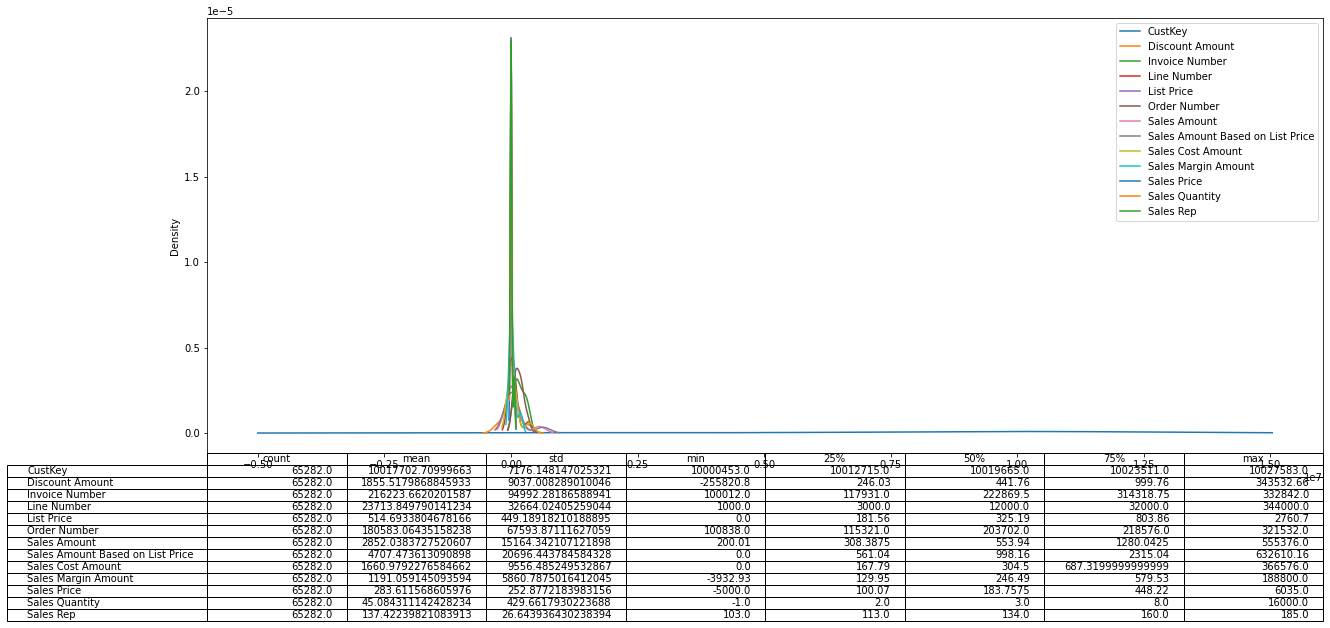

In [16]:
df.describe().plot.density(figsize=(20, 8), table=True)

### `Working With Dates`

In [17]:
df['DateKey'] = pd.to_datetime(df['DateKey'], format='%m/%d/%Y')

In [18]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%Y/%m/%d')

In [19]:
df['DateKey'] = pd.to_datetime(df['DateKey'].dt.strftime('%Y/%m/%d'))

In [20]:
df['Promised Delivery Date'] = pd.to_datetime(df['Promised Delivery Date'], format='%m/%d/%Y')

In [21]:
df['Promised Delivery Date'] = pd.to_datetime(df['Promised Delivery Date'].dt.strftime('%Y/%m/%d'))

In [22]:
df

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.75,2018-03-21,226497,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.16,2018-03-21,226497,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


In [23]:
df['DateKey_year'] = pd.DatetimeIndex(df['DateKey']).year
df['DateKey_month'] = pd.DatetimeIndex(df['DateKey']).month
df['DateKey_day'] = pd.DatetimeIndex(df['DateKey']).day

### `Analysis of Sales Margin Amount w.r.t Month`

In [24]:
year_2017 = (df['DateKey_year'] == 2017)
year_2018 = (df['DateKey_year'] == 2018) 
year_2019 = (df['DateKey_year'] == 2019) 

In [25]:
year_2017 = df[year_2017]
year_2018 = df[year_2018]
year_2019 = df[year_2019]

* As per the year starts the sales is pretty good may be this is the effect of new year sale that amazon offers 
* Between month of May and June the Sales is below from the average line

In [26]:
year_2017['DateKey_month']

0         4
1         7
2        10
3         6
4         5
         ..
58591    12
58592    12
58593    12
58594    12
58595    12
Name: DateKey_month, Length: 30575, dtype: int64

Text(1, 1750, 'Sales is heigh at 1st quarter')

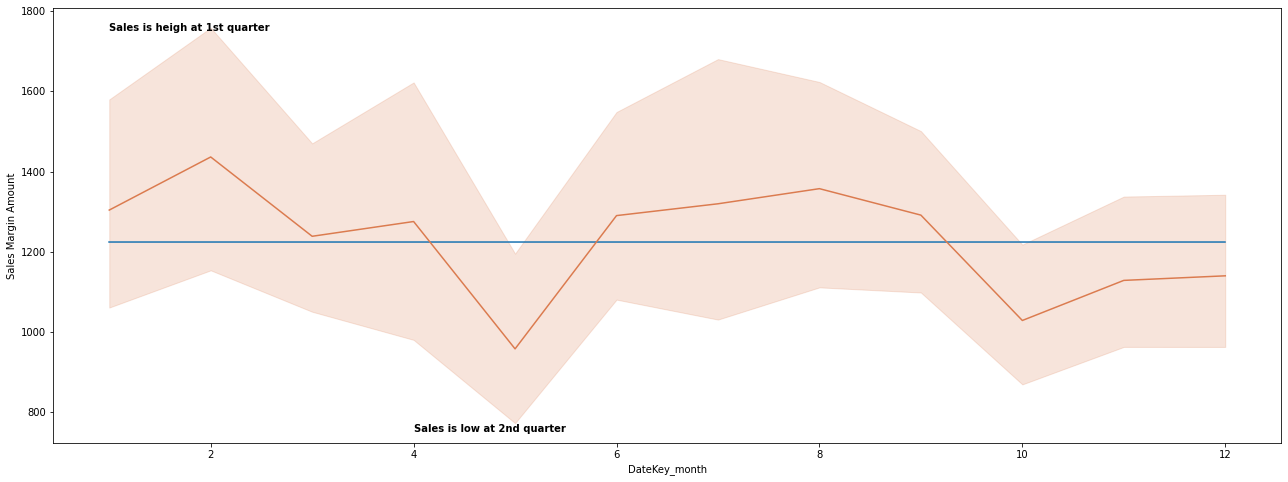

In [27]:
figure(figsize=(22, 8))
sns.lineplot(year_2017['DateKey_month'], np.mean(year_2017['Sales Margin Amount']))
sns.lineplot(year_2017['DateKey_month'], year_2017['Sales Margin Amount'], color="#db7b4f")
plt.text(4, 750, "Sales is low at 2nd quarter", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(1, 1750, "Sales is heigh at 1st quarter", horizontalalignment='left', size='medium', color='black', weight='semibold')

<AxesSubplot:xlabel='DateKey_month', ylabel='Sales Margin Amount'>

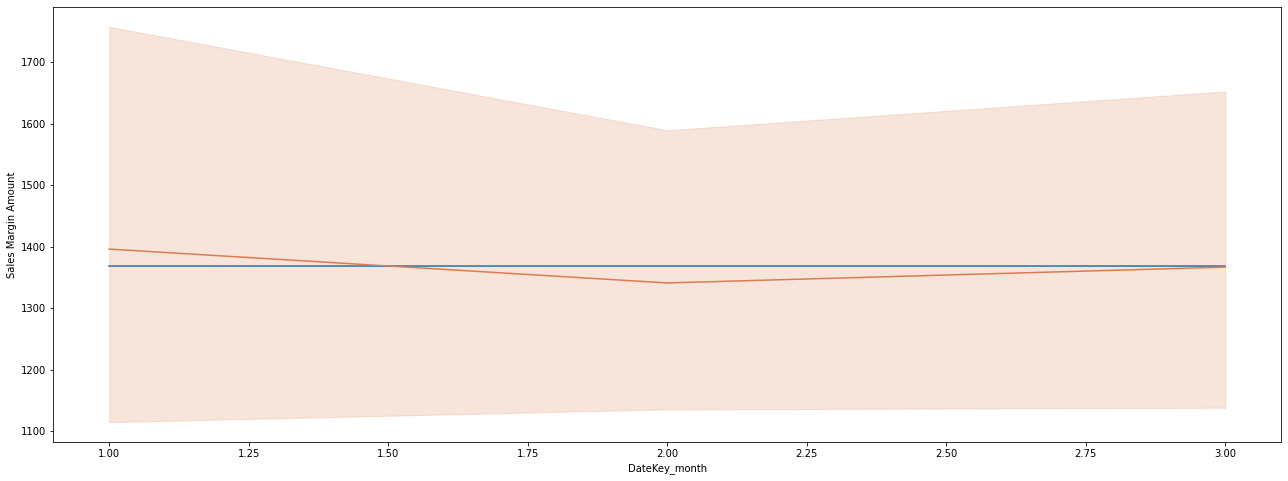

In [28]:
figure(figsize=(22, 8))
sns.lineplot(year_2018['DateKey_month'], np.mean(year_2018['Sales Margin Amount']))
sns.lineplot(year_2018['DateKey_month'], year_2018['Sales Margin Amount'], color="#db7b4f")

Text(1, 1850, 'Sales is heigh at 1st quarter')

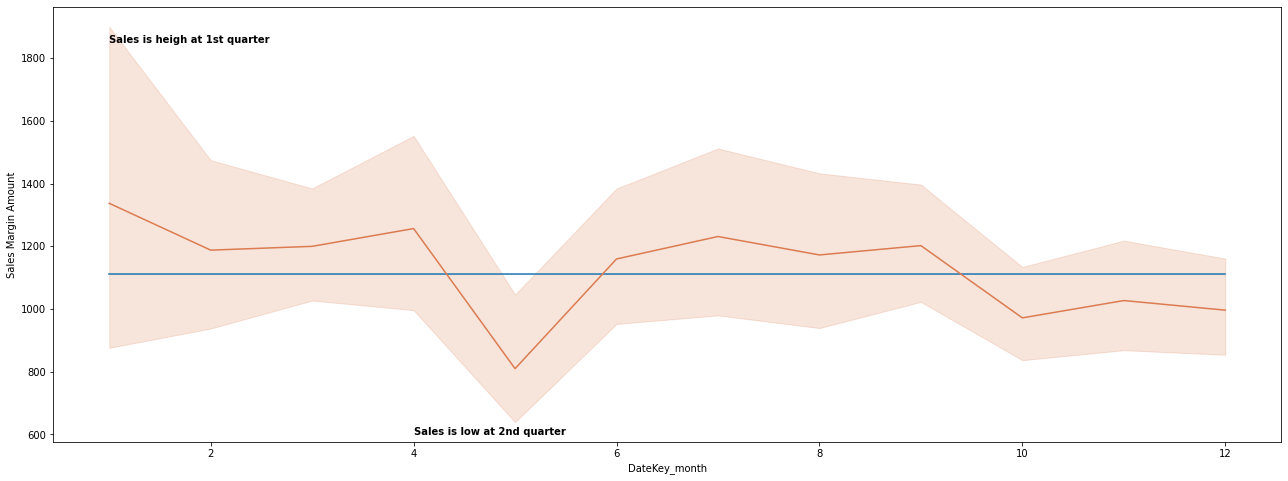

In [29]:
figure(figsize=(22, 8))
sns.lineplot(year_2019['DateKey_month'], np.mean(year_2019['Sales Margin Amount']))
sns.lineplot(year_2019['DateKey_month'], year_2019['Sales Margin Amount'], color="#db7b4f")
plt.text(4, 600, "Sales is low at 2nd quarter", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(1, 1850, "Sales is heigh at 1st quarter", horizontalalignment='left', size='medium', color='black', weight='semibold')

#### The trend is seen at the all of three years that the sales is higher at the start of year and then gradully decrease for first two quaters of year

* Quarter : First 3 Months (i.e q1(Quarter_1) is between 1-3 months; q2 is between 4-6 months) 

In [57]:
np.mean(year_2018['Sales Price'] * year_2018['Sales Quantity'])

3113.5912354172856

[Text(0, 0, '104.465'),
 Text(0, 0, '508.192'),
 Text(0, 0, '184.945'),
 Text(0, 0, '-455.117'),
 Text(0, 0, '-987.053'),
 Text(0, 0, '-145.559'),
 Text(0, 0, '-272.741'),
 Text(0, 0, '378.12'),
 Text(0, 0, '208.845'),
 Text(0, 0, '206.192'),
 Text(0, 0, '109.949'),
 Text(0, 0, '115.887')]

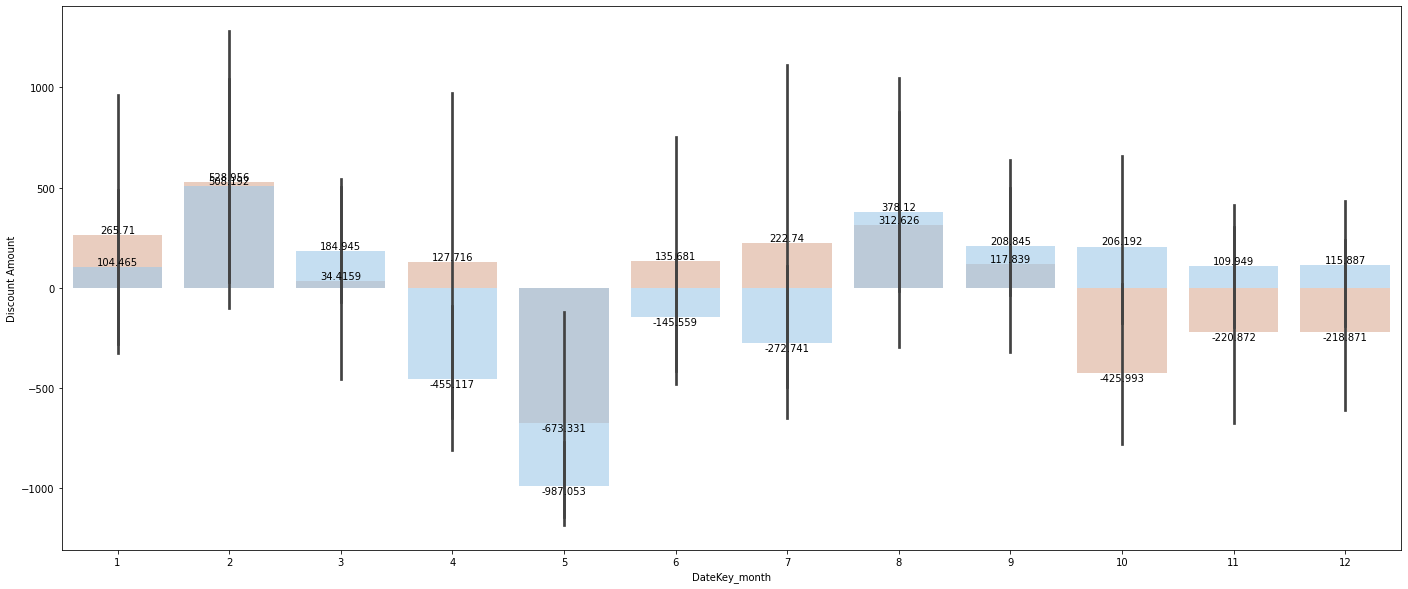

In [54]:
figure(figsize=(24, 10))
data_2017 = (year_2017['Sales Price'] * year_2017['Sales Quantity']) - 2860.5823234668833
data_1_2017 = year_2017['Discount Amount'] - 1802.562365422731
ax = sns.barplot(year_2017['DateKey_month'], data_2017, color="#db7b4f", alpha=0.4)
ax_1 = sns.barplot(year_2017['DateKey_month'], data_1_2017, color="#93caf5", alpha=0.6)
ax.bar_label(ax.containers[0])
ax_1.bar_label(ax_1.containers[1])

In [59]:
np.mean(year_2018['Discount Amount'])

1837.646583667365

[Text(0, 0, '157.106'), Text(0, 0, '-123.207'), Text(0, 0, '-42.8318')]

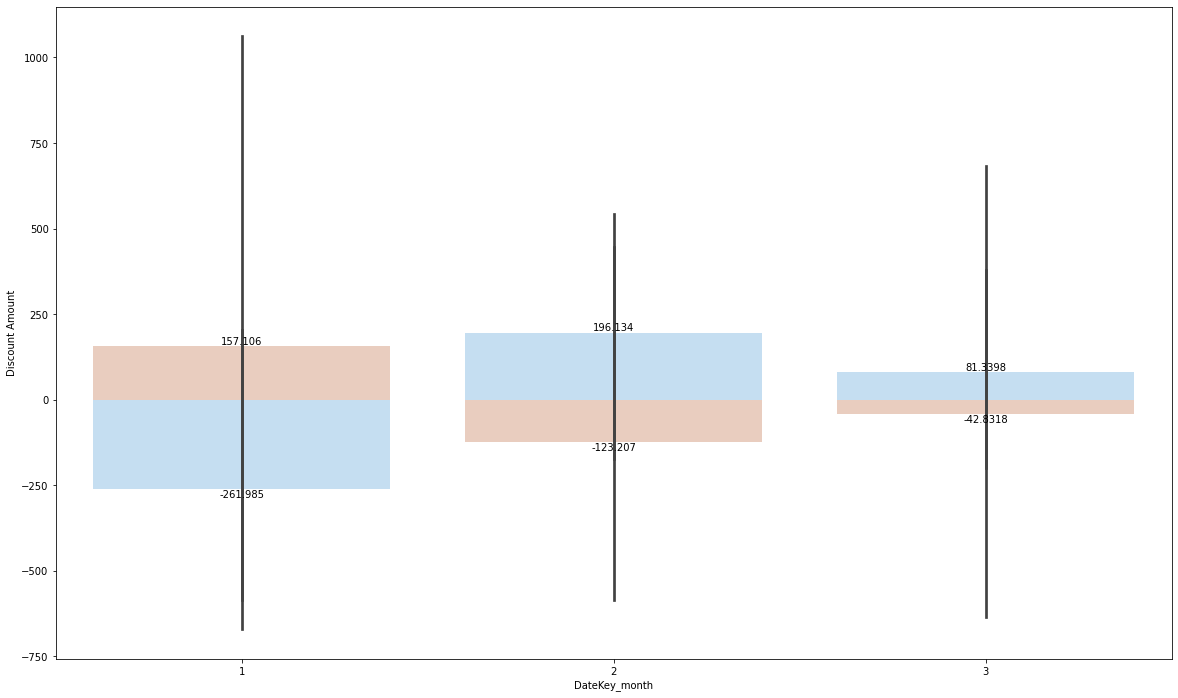

In [61]:
figure(figsize=(24, 10))
data_2018 = (year_2018['Sales Price'] * year_2018['Sales Quantity']) - 3113.5912354172856
discount_2018 = year_2018['Discount Amount'] - 1837.646583667365
#sns.lineplot(year_2017['DateKey_month'], np.mean(year_2017['Sales Margin Amount']))
ax = sns.barplot(year_2018['DateKey_month'], data_2018, color="#db7b4f", alpha=0.4)
ax_1 = sns.barplot(year_2018['DateKey_month'], discount_2018, color="#93caf5", alpha=0.6)
ax_1.bar_label(ax_1.containers[1])
ax.bar_label(ax.containers[0])

In [38]:
np.mean(year_2019['Discount Amount'])

1917.5645351200883

[Text(0, 0, '-142.76'),
 Text(0, 0, '77.327'),
 Text(0, 0, '382.459'),
 Text(0, 0, '95.1474'),
 Text(0, 0, '-1028.23'),
 Text(0, 0, '-263.11'),
 Text(0, 0, '-194.929'),
 Text(0, 0, '52.7037'),
 Text(0, 0, '382.76'),
 Text(0, 0, '3.85427'),
 Text(0, 0, '490.694'),
 Text(0, 0, '3.99122')]

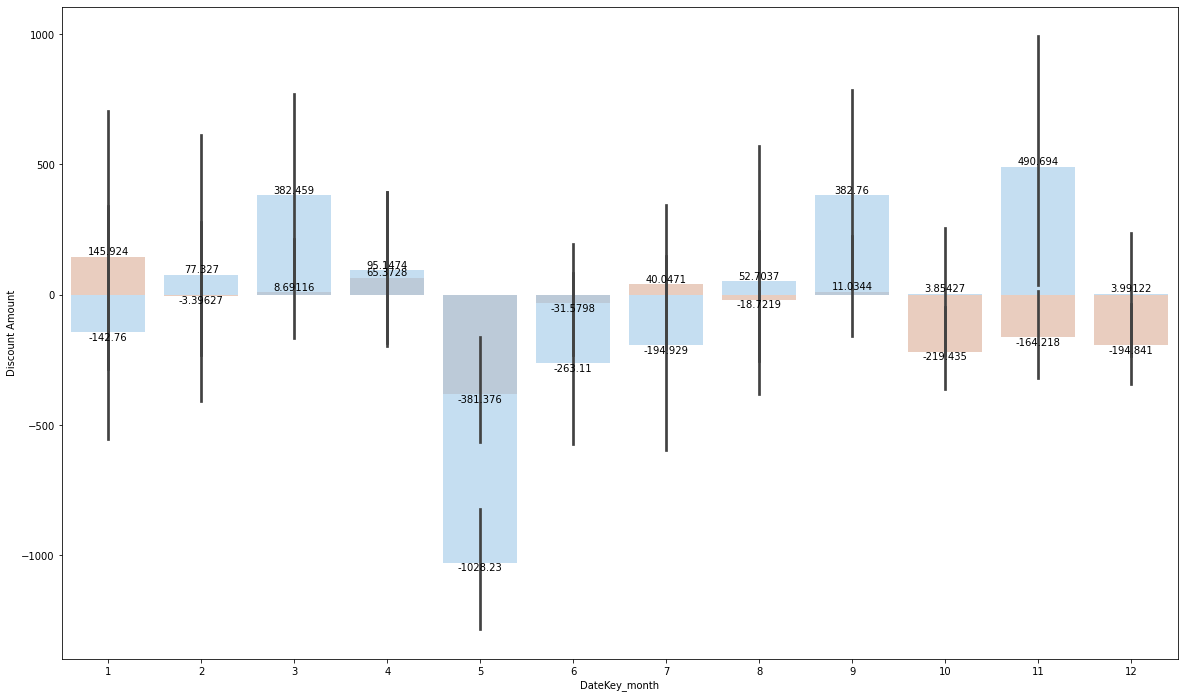

In [52]:
figure(figsize=(20, 12))
data_2019 = year_2019['Sales Margin Amount'] - 1191.059145093594
discount_2019 = year_2019['Discount Amount'] - 1917.5645351200883
ax = sns.barplot(year_2019['DateKey_month'], data_2019, color="#db7b4f", alpha=0.4)
ax_1 = sns.barplot(year_2019['DateKey_month'], discount_2019, color="#93caf5", alpha=0.6)
ax.bar_label(ax.containers[0])
ax_1.bar_label(ax_1.containers[1])

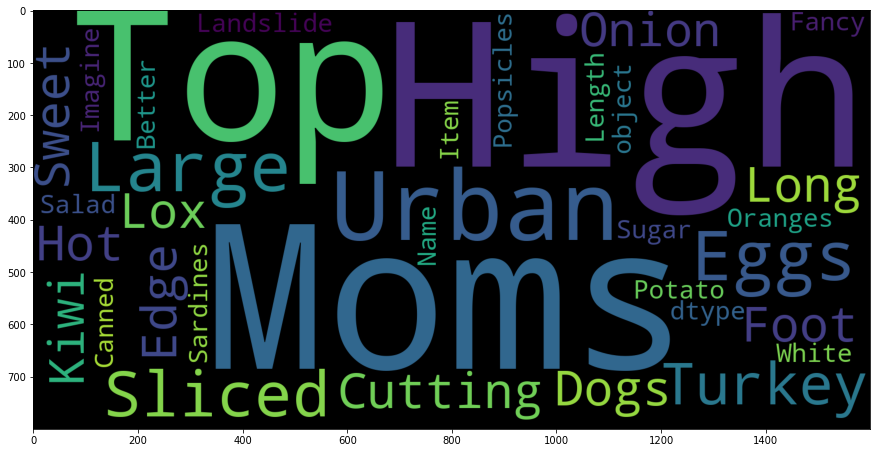

In [36]:
figure(figsize=(15, 10))
wc = WordCloud(max_words=600, width=1600, height=800).generate(str(df['Item']))
plt.imshow(wc)